In [33]:
# load the autoreload extension
%reload_ext autoreload
# Set extension to reload modules every time before executing code
%autoreload 2

import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import os
%matplotlib inline

# Import random forest regressor and multioutput regressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split
from sklearn.multioutput import MultiOutputRegressor
from sklearn.metrics import confusion_matrix,classification_report,accuracy_score,mean_squared_error
from sklearn.preprocessing import MinMaxScaler,StandardScaler

In [34]:
path = '/mnt/data4/Abhishek/WP/'
path_vpf = '/mnt/data4/Abhishek/VPF/random/'

In [35]:
def extractIndex(filename):
    return int(filename.split('_')[-1][:4])

In [36]:
f = np.loadtxt('/home/ajana/github/HODProject/parameters.txt')

In [43]:
random_data = []

for filename in os.listdir(path):
    if filename.startswith('wp_galaxies'):
        pos = extractIndex(filename)
        #wp,_ = np.load(os.path.join(path,filename))
        _,vpf = np.load(os.path.join(path_vpf,'vpf_'+filename[3:]))
        _temp = np.concatenate((vpf,wp,f[pos]))
        random_data.append(_temp)

In [44]:
full_data = np.vstack((random_data))
del random_data
np.random.shuffle(full_data)

In [45]:
y_data = full_data[:,:-34]
X_data = full_data[:,-5:]

In [46]:
y_data

array([[1.0000e+00, 9.9999e-01, 9.9997e-01, ..., 1.4100e-03, 8.0000e-05,
        0.0000e+00],
       [9.9999e-01, 9.9999e-01, 9.9999e-01, ..., 5.3400e-03, 3.7000e-04,
        0.0000e+00],
       [1.0000e+00, 1.0000e+00, 9.9999e-01, ..., 4.6000e-03, 2.9000e-04,
        0.0000e+00],
       ...,
       [1.0000e+00, 9.9999e-01, 9.9998e-01, ..., 4.9200e-03, 3.5000e-04,
        0.0000e+00],
       [9.9999e-01, 9.9999e-01, 9.9997e-01, ..., 4.1800e-03, 2.7000e-04,
        0.0000e+00],
       [1.0000e+00, 9.9998e-01, 9.9996e-01, ..., 3.8900e-03, 2.8000e-04,
        1.0000e-05]])

In [47]:
X_train, X_test, y_train, y_test = train_test_split(X_data, y_data, test_size=0.1,random_state=42)

In [48]:
X_train.shape, y_test.shape

((4500, 5), (500, 30))

In [49]:
#fit Random Forest Regressor

reg_rf = RandomForestRegressor(
    n_estimators=3000,
    criterion='mse',
    max_depth=None,
    min_samples_split=2,
    min_samples_leaf=1,
    min_weight_fraction_leaf=0.0,
    max_features=None,
    max_leaf_nodes=None,
    min_impurity_decrease=0.0,
    min_impurity_split=None,
    bootstrap=True,
    oob_score=False,
    n_jobs=-1,
    random_state=0,
    verbose=0,
    warm_start=False,
)

reg_rf.fit(X_train,y_train)
y_rf = reg_rf.predict(X_test)


In [50]:
mean_squared_error(y_rf,y_test,multioutput='raw_values',squared=False)

array([8.38020944e-11, 1.34154436e-10, 2.26236731e-10, 3.96995968e-10,
       7.34703093e-10, 1.27254073e-09, 2.18201811e-09, 3.40917745e-09,
       6.04634256e-09, 1.01761935e-08, 1.85817273e-08, 2.95371092e-08,
       5.15955685e-08, 7.78740772e-08, 1.34775227e-07, 2.52221054e-07,
       4.17916411e-07, 6.49043694e-07, 1.05989025e-06, 1.50838176e-06,
       2.27302601e-06, 3.10105362e-06, 3.52300157e-06, 3.37241683e-06,
       2.23643780e-06, 1.12986716e-06, 3.20555628e-07, 5.41031347e-08,
       3.80255546e-09, 1.06121684e-10])

In [51]:
print (np.mean(((y_rf - y_test)/y_test)*100, axis=0))

[-2.47519431e-05 -1.62886128e-05 -4.10713172e-05 -5.77959067e-05
 -3.79463469e-05 -8.01900107e-05  2.31002014e-05 -9.89348827e-05
  7.34701221e-05 -2.82241017e-05 -2.17004654e-04 -3.22280894e-04
 -6.75984546e-04 -1.40135982e-03 -1.39930674e-03 -1.85429842e-03
  3.84081500e-04 -2.57638855e-03  6.75444284e-05  1.07689004e-03
  1.53389811e-03  6.17300233e-03 -4.39659482e-03 -2.72286211e-02
 -6.68842077e-02 -1.19392852e-01 -2.12999544e-01  3.89098199e-01
             inf             inf]


/home/ajana/.local/lib/python3.7/site-packages/ipykernel_launcher.py:1: RuntimeWarning: divide by zero encountered in true_divide
  """Entry point for launching an IPython kernel.


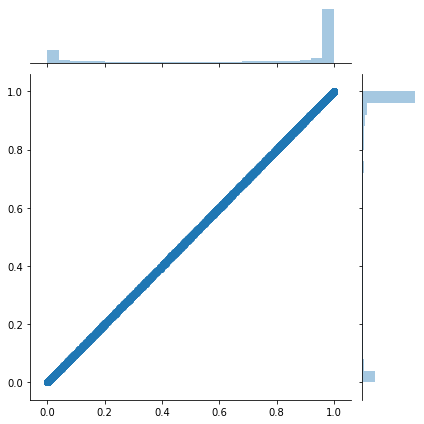

In [52]:
sns.jointplot(y_test,y_rf,kind='scatter')

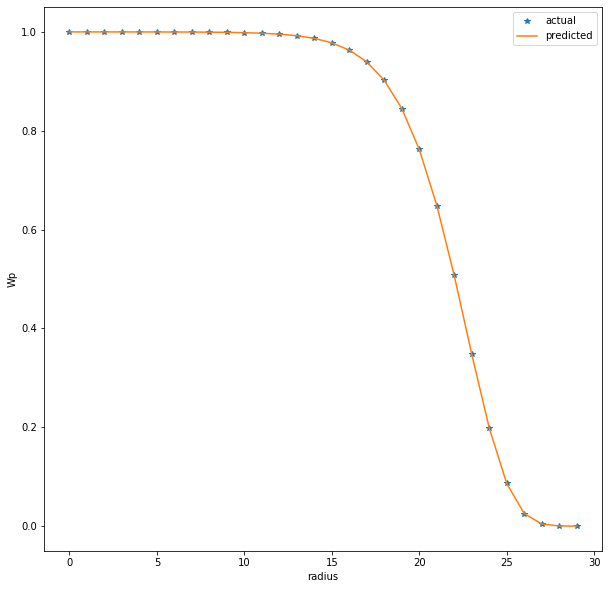

In [53]:
plt.figure(figsize=(10,10))
plt.plot(np.arange(30),y_test[10,:],'*',label='actual')
plt.plot(np.arange(30),y_rf[10],label='predicted')
plt.legend()
plt.xlabel('radius')
plt.ylabel('Wp')
plt.savefig('Wp_fittng.png')

In [54]:
dely = y_rf - y_test

In [55]:
radius = np.logspace(-1,1.5,30)
mean = np.mean(dely,axis = 0)
std = np.std(dely,axis = 0)

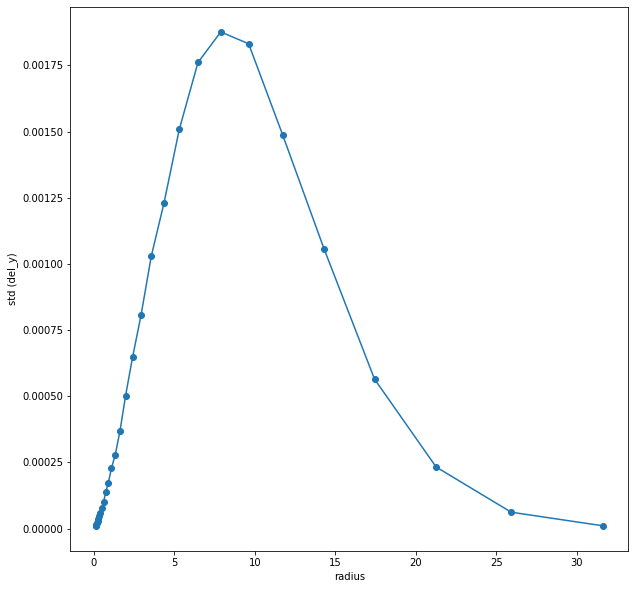

In [57]:
plt.figure(figsize=(10,10))
plt.plot(radius,std,'o-')
plt.ylabel('std (del_y)')
plt.xlabel('radius')
plt.savefig('WP_Std_vs_radius.png')

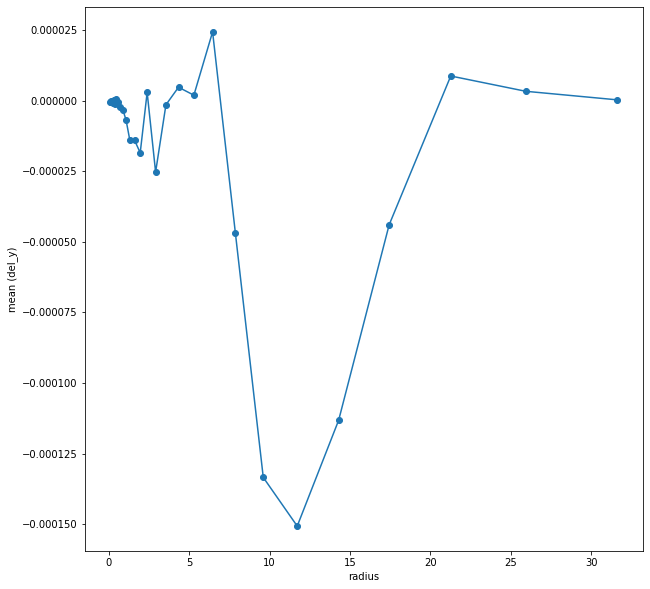

In [58]:
plt.figure(figsize=(10,10))
plt.plot(radius,mean,'o-')
plt.ylabel('mean (del_y)')
plt.xlabel('radius')
plt.savefig('WP_mean_vs_radius.png')

In [59]:
maximum = np.max(dely,axis=1)


/home/ajana/anaconda3/lib/python3.7/site-packages/matplotlib/collections.py:857: RuntimeWarning: invalid value encountered in sqrt
  scale = np.sqrt(self._sizes) * dpi / 72.0 * self._factor


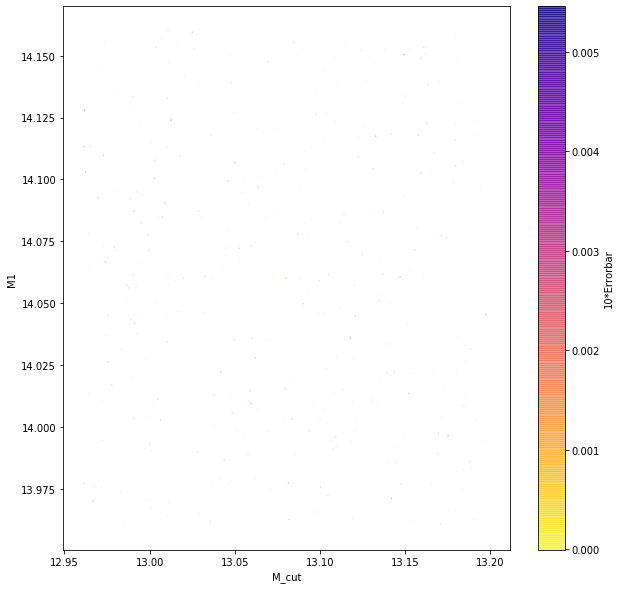

In [60]:
from matplotlib import cm
plt.figure(figsize=(10,10))
plt.scatter(X_test[:,0],X_test[:,1],c=maximum,s = 10*maximum,cmap='plasma_r',alpha=0.7)
plt.xlabel('M_cut')
plt.ylabel('M1')
cbar = plt.colorbar()
cbar.set_label('10*Errorbar')
plt.savefig('WP_M1_vs_M_cut.png')

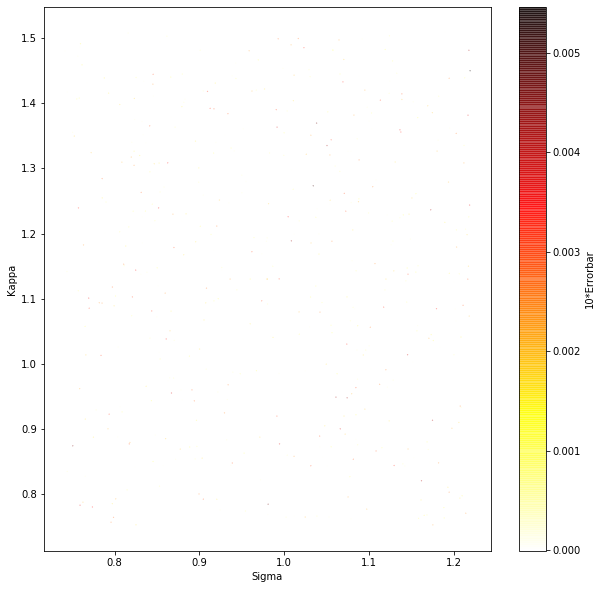

In [61]:
plt.figure(figsize=(10,10))
plt.scatter(X_test[:,2],X_test[:,3],c=maximum,s = 10*maximum,cmap='hot_r',alpha=0.7)
plt.xlabel('Sigma')
plt.ylabel('Kappa')
cbar = plt.colorbar()
cbar.set_label('10*Errorbar')
plt.savefig('WP_Kappa_vs_Sigma.png')

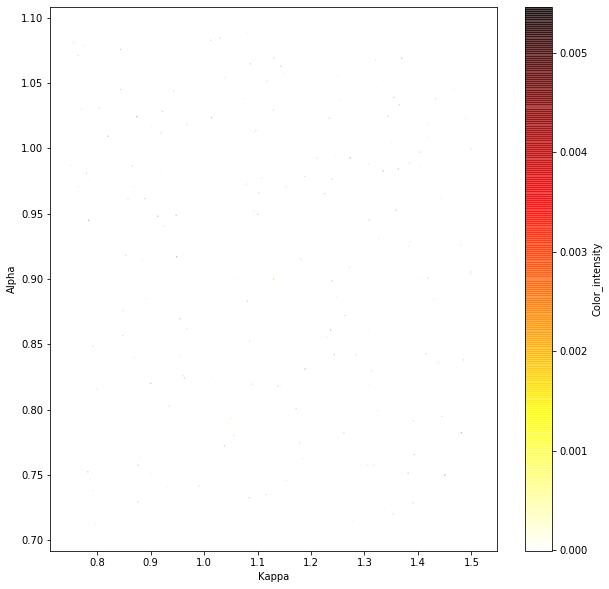

In [62]:
plt.figure(figsize=(10,10))
plt.scatter(X_test[:,3],X_test[:,4],c=maximum,s = 10*maximum,cmap='hot_r',alpha=0.7)
plt.xlabel('Kappa')
plt.ylabel('Alpha')
cbar = plt.colorbar()
cbar.set_label('Color_intensity')

In [63]:
from keras.models import Sequential
from keras.layers import Dense
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
import tensorflow as tf
from tensorflow.keras import layers
from tensorflow import keras

from sklearn.preprocessing import  MinMaxScaler
sc= MinMaxScaler()
X_data= sc.fit_transform(X_data)
y_data= y_data.reshape(-1,30)
y_data=sc.fit_transform(y_data)

in_dim = X_train.shape[1]
out_dim = y_train.shape[1]



In [64]:
def build_model(in_dim,out_dim):
    model = keras.Sequential([
        layers.Dense(256, activation='relu', input_dim=in_dim),
        layers.Dense(128, activation='relu'),
        layers.Dense(64, activation='relu'),
        layers.Dense(out_dim)
      ])

    optimizer = tf.keras.optimizers.RMSprop(0.0001)

    model.compile(loss='mse',
                    optimizer=optimizer,
                    metrics=['mae', 'mse'])
    return model

In [65]:
mod = build_model(in_dim,out_dim)
mod.summary()

W0709 00:43:40.348476 140553403135808 deprecation.py:506] From /home/ajana/.local/lib/python3.7/site-packages/tensorflow/python/ops/init_ops.py:1257: calling VarianceScaling.__init__ (from tensorflow.python.ops.init_ops) with dtype is deprecated and will be removed in a future version.
Instructions for updating:
Call initializer instance with the dtype argument instead of passing it to the constructor


Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 256)               1536      
_________________________________________________________________
dense_1 (Dense)              (None, 128)               32896     
_________________________________________________________________
dense_2 (Dense)              (None, 64)                8256      
_________________________________________________________________
dense_3 (Dense)              (None, 30)                1950      
Total params: 44,638
Trainable params: 44,638
Non-trainable params: 0
_________________________________________________________________


In [66]:
history = mod.fit(X_train, y_train, epochs=200,validation_split=0.2, verbose=1)

Train on 3600 samples, validate on 900 samples
Epoch 1/200
3600/3600 [==============================] - 1s 201us/sample - loss: 0.3119 - mean_absolute_error: 0.3889 - mean_squared_error: 0.3119 - val_loss: 0.0480 - val_mean_absolute_error: 0.1681 - val_mean_squared_error: 0.0480
Epoch 2/200
3600/3600 [==============================] - 0s 62us/sample - loss: 0.0102 - mean_absolute_error: 0.0618 - mean_squared_error: 0.0102 - val_loss: 9.6653e-04 - val_mean_absolute_error: 0.0252 - val_mean_squared_error: 9.6653e-04
Epoch 3/200
3600/3600 [==============================] - 0s 76us/sample - loss: 8.8895e-04 - mean_absolute_error: 0.0231 - mean_squared_error: 8.8895e-04 - val_loss: 0.0011 - val_mean_absolute_error: 0.0249 - val_mean_squared_error: 0.0011
Epoch 4/200
3600/3600 [==============================] - 0s 63us/sample - loss: 8.7207e-04 - mean_absolute_error: 0.0226 - mean_squared_error: 8.7207e-04 - val_loss: 8.5248e-04 - val_mean_absolute_error: 0.0226 - val_mean_squared_error: 8.5

Epoch 34/200
3600/3600 [==============================] - 0s 62us/sample - loss: 4.7821e-04 - mean_absolute_error: 0.0170 - mean_squared_error: 4.7821e-04 - val_loss: 3.6914e-04 - val_mean_absolute_error: 0.0155 - val_mean_squared_error: 3.6914e-04
Epoch 35/200
3600/3600 [==============================] - 0s 49us/sample - loss: 4.6610e-04 - mean_absolute_error: 0.0168 - mean_squared_error: 4.6610e-04 - val_loss: 4.5499e-04 - val_mean_absolute_error: 0.0160 - val_mean_squared_error: 4.5499e-04
Epoch 36/200
3600/3600 [==============================] - 0s 49us/sample - loss: 4.5488e-04 - mean_absolute_error: 0.0167 - mean_squared_error: 4.5488e-04 - val_loss: 4.1347e-04 - val_mean_absolute_error: 0.0157 - val_mean_squared_error: 4.1347e-04
Epoch 37/200
3600/3600 [==============================] - 0s 49us/sample - loss: 4.5959e-04 - mean_absolute_error: 0.0168 - mean_squared_error: 4.5959e-04 - val_loss: 5.7165e-04 - val_mean_absolute_error: 0.0195 - val_mean_squared_error: 5.7165e-04
Epoc

Epoch 67/200
3600/3600 [==============================] - 0s 53us/sample - loss: 2.8848e-04 - mean_absolute_error: 0.0134 - mean_squared_error: 2.8848e-04 - val_loss: 3.3541e-04 - val_mean_absolute_error: 0.0148 - val_mean_squared_error: 3.3541e-04
Epoch 68/200
3600/3600 [==============================] - 0s 64us/sample - loss: 2.8641e-04 - mean_absolute_error: 0.0133 - mean_squared_error: 2.8641e-04 - val_loss: 2.9032e-04 - val_mean_absolute_error: 0.0138 - val_mean_squared_error: 2.9032e-04
Epoch 69/200
3600/3600 [==============================] - 0s 52us/sample - loss: 2.8906e-04 - mean_absolute_error: 0.0135 - mean_squared_error: 2.8906e-04 - val_loss: 2.4148e-04 - val_mean_absolute_error: 0.0120 - val_mean_squared_error: 2.4148e-04
Epoch 70/200
3600/3600 [==============================] - 0s 58us/sample - loss: 2.8220e-04 - mean_absolute_error: 0.0132 - mean_squared_error: 2.8220e-04 - val_loss: 2.2722e-04 - val_mean_absolute_error: 0.0109 - val_mean_squared_error: 2.2722e-04
Epoc

Epoch 100/200
3600/3600 [==============================] - 0s 121us/sample - loss: 2.1747e-04 - mean_absolute_error: 0.0116 - mean_squared_error: 2.1747e-04 - val_loss: 2.0993e-04 - val_mean_absolute_error: 0.0115 - val_mean_squared_error: 2.0993e-04
Epoch 101/200
3600/3600 [==============================] - 0s 72us/sample - loss: 2.1353e-04 - mean_absolute_error: 0.0115 - mean_squared_error: 2.1353e-04 - val_loss: 2.3527e-04 - val_mean_absolute_error: 0.0120 - val_mean_squared_error: 2.3527e-04
Epoch 102/200
3600/3600 [==============================] - 0s 112us/sample - loss: 2.1488e-04 - mean_absolute_error: 0.0115 - mean_squared_error: 2.1488e-04 - val_loss: 1.7997e-04 - val_mean_absolute_error: 0.0110 - val_mean_squared_error: 1.7997e-04
Epoch 103/200
3600/3600 [==============================] - 0s 108us/sample - loss: 2.0978e-04 - mean_absolute_error: 0.0114 - mean_squared_error: 2.0978e-04 - val_loss: 1.9095e-04 - val_mean_absolute_error: 0.0109 - val_mean_squared_error: 1.9095e-

Epoch 133/200
3600/3600 [==============================] - 0s 79us/sample - loss: 1.7147e-04 - mean_absolute_error: 0.0103 - mean_squared_error: 1.7147e-04 - val_loss: 2.1656e-04 - val_mean_absolute_error: 0.0115 - val_mean_squared_error: 2.1656e-04
Epoch 134/200
3600/3600 [==============================] - 0s 94us/sample - loss: 1.7188e-04 - mean_absolute_error: 0.0103 - mean_squared_error: 1.7188e-04 - val_loss: 1.2627e-04 - val_mean_absolute_error: 0.0093 - val_mean_squared_error: 1.2627e-04
Epoch 135/200
3600/3600 [==============================] - 0s 102us/sample - loss: 1.7099e-04 - mean_absolute_error: 0.0104 - mean_squared_error: 1.7099e-04 - val_loss: 1.2121e-04 - val_mean_absolute_error: 0.0083 - val_mean_squared_error: 1.2121e-04
Epoch 136/200
3600/3600 [==============================] - 0s 102us/sample - loss: 1.7233e-04 - mean_absolute_error: 0.0101 - mean_squared_error: 1.7233e-04 - val_loss: 1.1741e-04 - val_mean_absolute_error: 0.0081 - val_mean_squared_error: 1.1741e-0

Epoch 166/200
3600/3600 [==============================] - 0s 117us/sample - loss: 1.4282e-04 - mean_absolute_error: 0.0092 - mean_squared_error: 1.4282e-04 - val_loss: 1.3256e-04 - val_mean_absolute_error: 0.0095 - val_mean_squared_error: 1.3256e-04
Epoch 167/200
3600/3600 [==============================] - 1s 155us/sample - loss: 1.3786e-04 - mean_absolute_error: 0.0092 - mean_squared_error: 1.3786e-04 - val_loss: 1.1727e-04 - val_mean_absolute_error: 0.0088 - val_mean_squared_error: 1.1727e-04
Epoch 168/200
3600/3600 [==============================] - 0s 138us/sample - loss: 1.4058e-04 - mean_absolute_error: 0.0092 - mean_squared_error: 1.4058e-04 - val_loss: 1.0172e-04 - val_mean_absolute_error: 0.0082 - val_mean_squared_error: 1.0172e-04
Epoch 169/200
3600/3600 [==============================] - 1s 153us/sample - loss: 1.3790e-04 - mean_absolute_error: 0.0091 - mean_squared_error: 1.3790e-04 - val_loss: 1.0013e-04 - val_mean_absolute_error: 0.0076 - val_mean_squared_error: 1.0013e

Epoch 199/200
3600/3600 [==============================] - 0s 87us/sample - loss: 1.2380e-04 - mean_absolute_error: 0.0086 - mean_squared_error: 1.2380e-04 - val_loss: 1.3907e-04 - val_mean_absolute_error: 0.0085 - val_mean_squared_error: 1.3907e-04
Epoch 200/200
3600/3600 [==============================] - 0s 100us/sample - loss: 1.2217e-04 - mean_absolute_error: 0.0087 - mean_squared_error: 1.2217e-04 - val_loss: 1.4921e-04 - val_mean_absolute_error: 0.0084 - val_mean_squared_error: 1.4921e-04


In [67]:
y_pred = mod.predict(X_test)

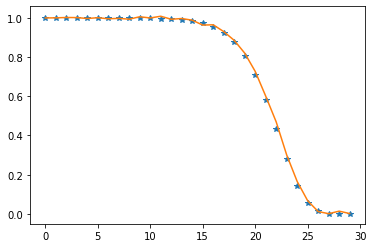

In [68]:
plt.plot(np.arange(30),y_test[13,:],'*')
plt.plot(np.arange(30),y_pred[13])

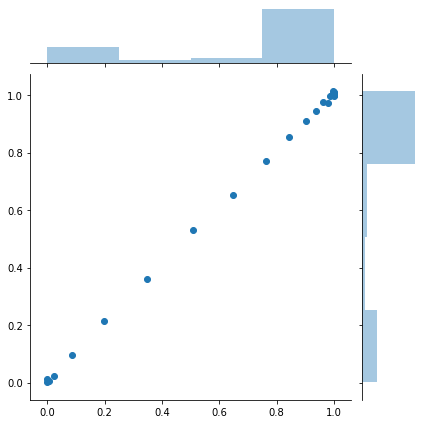

In [69]:
sns.jointplot(y_test[10],y_pred[10],kind='scatter')

In [73]:
import joblib
# save the model to disk
filename = 'vpf_model.sav'
joblib.dump(reg_rf, filename)

['vpf_model.sav']

In [75]:
X_test[0]

array([13.061123, 14.135037,  0.969301,  1.323751,  0.729949])